# Preamble

Let's set up the environment first. We need the coingecko API to fetch prices, and pandas to work with timeseries (and tabular data in general).

In [2]:
from pycoingecko import CoinGeckoAPI
gecko = CoinGeckoAPI()

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
import datetime as dt

# Basic

## Ping

Is coingecko up?

In [6]:
if gecko.ping()['gecko_says'].find('To the Moon!') != -1:
    print ("CoinGecko is up!")
else:
    print ("CoinGecko is down...")

CoinGecko is up!


Congrats?!

## List of coins

Let's see what assets we have to work with.

In [7]:
coins_list = pd.DataFrame(gecko.get_coins_list())

Is BTC present in this list? Is FLOW? Just a sanity check.

In [8]:
coins_list.loc[coins_list.applymap(lambda x: x == "btc").any(axis=1)]

,id,symbol,name
809,bitcoin,btc,Bitcoin


In [9]:
coins_list.loc[coins_list.applymap(lambda x: x == "flow").any(axis=1)]

,id,symbol,name
2457,flow,flow,Flow


Seems so.

## Price

What about their current market price? (And other data?)

In [10]:
p = gecko.get_price('bitcoin,ethereum,flow', 'usd', include_market_cap='true', include_24hr_vol='true', include_24hr_change='true', include_last_updated_at='true')

for key in p:
    print ("{}:".format(key.capitalize()))
    print ("\tPrice: ${}, Market Cap: ${}".format(p[key]['usd'], p[key]['usd_market_cap']))
    print ("\t24Hr Change: {:.2f}%, 24Hr Volume: {:.2f}".format(p[key]['usd_24h_change'], p[key]['usd_24h_vol']))
    print ("\t(Last updated at {} UTC)".format(dt.datetime.utcfromtimestamp(p[key]['last_updated_at'])))
    print ()

Bitcoin:
	Price: $55876, Market Cap: $1042184275332.6417
	24Hr Change: 0.86%, 24Hr Volume: 47780607763.32
	(Last updated at 2021-03-28 00:06:46 UTC)

Ethereum:
	Price: $1713.15, Market Cap: $197496023917.27393
	24Hr Change: 0.18%, 24Hr Volume: 20956324600.53
	(Last updated at 2021-03-28 00:07:23 UTC)

Flow:
	Price: $27.3, Market Cap: $896159333.3936937
	24Hr Change: -8.24%, 24Hr Volume: 55032330.47
	(Last updated at 2021-03-28 00:07:40 UTC)



# Historical price charts

Finally, let us chart the price for the past 2 years.

In [11]:
p = gecko.get_coin_market_chart_by_id('bitcoin', 'usd', days=730)

<IPython.core.display.Javascript object>


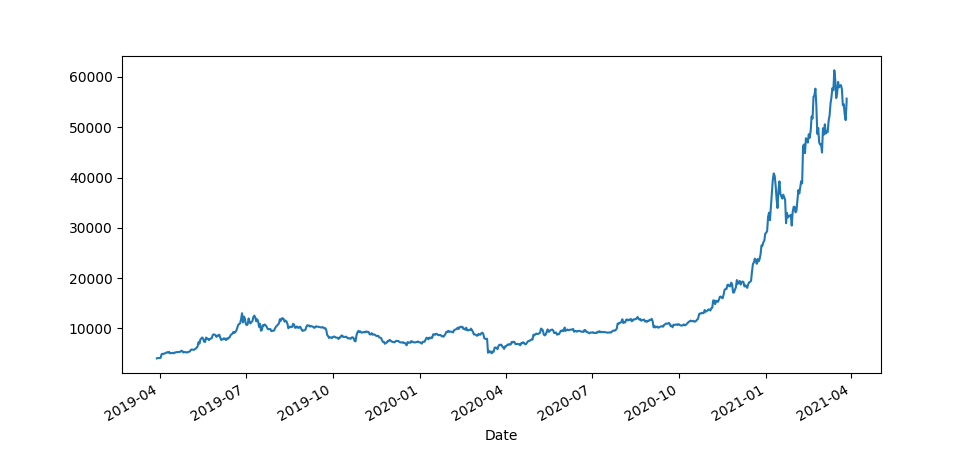

In [14]:
df = pd.DataFrame(p['prices'], columns=['Date (Raw)', 'Price'])
df.index = pd.to_datetime(df['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
df.index.name = 'Date'

fig = plt.figure(); df['Price'].plot(figure=fig);

That's the chart of BTCUSD over the past two years. Really should've bought some, shouldn't we?

Next, the chart of the total volume per day. Notice the cyclical nature.

<IPython.core.display.Javascript object>


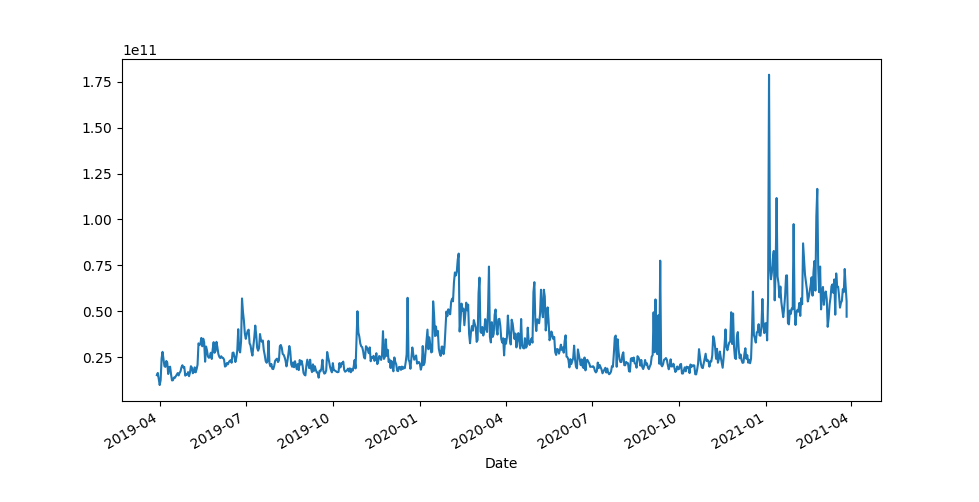

In [15]:
df = pd.DataFrame(p['total_volumes'], columns=['Date (Raw)', 'Volume']);
df.index = pd.to_datetime(df['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()));
df.index.name = 'Date';

fig = plt.figure(); df['Volume'].plot(figure=fig);

In [23]:
for id in coins_list['id'].head(10):
    p = gecko.get_coin_market_chart_by_id(id, 'usd', days=1548)
    df = pd.DataFrame(p['prices'], columns=['Date (Raw)', 'Price'])
    df.index = pd.to_datetime(df['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
    df.index.name = 'Date'
    
    print (df.head(10))
    print ()

               Date (Raw)     Price
Date                               
2018-09-15  1536969600000  0.009788
2018-09-16  1537056000000  0.009883
2018-09-17  1537142400000  0.012145
2018-09-18  1537228800000  0.007965
2018-09-19  1537315200000  0.011866
2018-09-20  1537401600000  0.011457
2018-09-21  1537488000000  0.009856
2018-09-22  1537574400000  0.010346
2018-09-23  1537660800000  0.012510
2018-09-24  1537747200000  0.008730

               Date (Raw)         Price
Date                                   
2020-08-18  1597708800000  11007.434351
2020-08-19  1597795200000  11007.434351
2020-08-20  1597881600000  10946.390295
2020-08-21  1597968000000  11055.636509
2020-08-22  1598054400000  11055.636509
2020-08-23  1598140800000  11086.451335
2020-09-06  1599350400000   9147.461686
2020-09-07  1599436800000   9147.461686
2020-09-08  1599523200000   8892.703764
2020-10-29  1603929600000   7497.077684

               Date (Raw)        Price
Date                                  
2020-10-

In [29]:
    coins_list.iloc[0]

id        01coin
symbol       zoc
name      01coin
Name: 0, dtype: object

In [31]:
p = gecko.get_coin_market_chart_by_id('01coin', 'usd', days=1548)
df1 = pd.DataFrame(p['prices'], columns=['Date (Raw)', 'Price'])
df1.index = pd.to_datetime(df1['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
df1.index.name = 'Date'

p = gecko.get_coin_market_chart_by_id('californium', 'usd', days=1548)
df2 = pd.DataFrame(p['prices'], columns=['Date (Raw)', 'Price'])
df2.index = pd.to_datetime(df2['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
df2.index.name = 'Date'

In [44]:
df1.columns = ['DateR', '01coin']
df2.columns = ['DateR', 'californium']

df1.join(df2, how='outer', lsuffix=1, rsuffix=2)

,DateR1,01coin,DateR2,californium
Date,,,,
2018-03-28,NaN,NaN,1.522195e+12,0.037557
2018-03-29,NaN,NaN,1.522282e+12,0.059229
2018-03-30,NaN,NaN,1.522368e+12,0.037870
2018-03-31,NaN,NaN,1.522454e+12,0.035728
2018-04-01,NaN,NaN,1.522541e+12,0.057172
...,...,...,...,...
2021-03-25,1.616630e+12,0.003836,1.616630e+12,0.010168
2021-03-26,1.616717e+12,0.003811,1.616717e+12,0.009464
2021-03-27,1.616803e+12,0.004109,1.616803e+12,0.010767


In [52]:
df2.to_numpy().nbytes

13440

In [78]:
df_complete = pd.DataFrame(index=pd.date_range(start='20170101', freq='1D', end='20210327'))

for id in coins_list['id']:
    p = gecko.get_coin_market_chart_by_id(id, 'usd', days=1548)
    df = pd.DataFrame(p['prices'], columns=['Date', id])
    df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
    df.set_index("Date", inplace=True)

    df_complete = df_complete.join(df, how='left')

HTTPError: 429 Client Error: Too Many Requests for url: https://api.coingecko.com/api/v3/coins/1x-short-dogecoin-token/market_chart?vs_currency=usd&days=1548

In [77]:
df_complete.iloc[:10,:10]

,01coin,0-5x-long-algorand-token,0-5x-long-altcoin-index-token,0-5x-long-balancer-token,0-5x-long-bitcoin-cash-token,0-5x-long-bitcoin-sv-token,0-5x-long-bitcoin-token,0-5x-long-cardano-token,0-5x-long-chainlink-token,0-5x-long-cosmos-token
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
